In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tifffile

In [4]:
data_crop = tifffile.imread("chafer_example_data.tif")
labels_crop = tifffile.imread("chafer_example_data_label.tif")
resimg = tifffile.imread("chafer_example_data_chaferfiltered.tif")

### Total variation

Total variation defined as

$$ V(y) = \sum_{i,j} \sqrt{|y_{i+1,j} - y_{i,j}|^2 + |y_{i,j+1} - y_{i,j}|^2} $$

with $y_{n,m}$ being the image

In [5]:
def get_totalvariation(image2d):
    image2d = image2d.astype(np.float32)
    #deriv_y = image2d[1:,:] - image2d[0:-1,:]
    deriv_y = image2d[1:,:-1] - image2d[0:-1,:-1]

    #deriv_x = image2d[:,1:] - image2d[:,0:-1]
    deriv_x = image2d[:-1,1:] - image2d[:-1,0:-1]

    return np.sum( np.sqrt( deriv_y*deriv_y + deriv_x*deriv_x ) )

In [6]:
tv_data = get_totalvariation(data_crop)
tv_res = get_totalvariation(resimg)

In [7]:
f"{tv_res:0.4e}"

'7.4564e+06'

In [8]:
f"{tv_data:0.4e}"

'7.4406e+06'

In [9]:
tv_res/tv_data

1.0021214

Total variation goes up!

### Total variation using label as mask

In [10]:
def get_totalvariation_masked(image2d, mask):
    image2d = image2d.astype(np.float32)
    deriv_y = image2d[1:,:-1] - image2d[0:-1,:-1]

    deriv_x = image2d[:-1,1:] - image2d[:-1,0:-1]

    img_sqrt = np.sqrt( deriv_y*deriv_y + deriv_x*deriv_x )

    mask_fix = np.where(mask[:-1,:-1]>0, 0.0, 1.0) 
    img_sqrt_mask = img_sqrt * mask_fix

    return np.sum( img_sqrt_mask )

In [11]:
tv_data1 = get_totalvariation_masked(data_crop, labels_crop)
tv_res1 = get_totalvariation_masked(resimg, labels_crop)

In [12]:
print(tv_data1)
print(tv_res1)

7401135.816722989
7400131.346546888


In [13]:
print(f"{tv_data1:0.3e}")
print(f"{tv_res1:0.3e}")

7.401e+06
7.400e+06


## Standard deviation of intensities

In [14]:
def get_stddev_of_intensities_masked(image2d, label_as_mask):
    image2d = image2d.astype(np.float32)

    mask_nan = np.where(label_as_mask>0, np.nan, 1.0)

    image2d_masked = mask_nan*image2d

    std_masked = np.nanstd(image2d_masked)

    return std_masked

In [15]:
std_int_data = get_stddev_of_intensities_masked(data_crop, labels_crop)
print(std_int_data)
std_int_res = get_stddev_of_intensities_masked(resimg, labels_crop)
print(std_int_res)

16.607050110345487
10.040310730938792


In [16]:
std_int_res/std_int_data

0.6045812269021881

This stdev appears to be a good metric of to use for giving an idea of how good the charge removal algorithm permored

# Mouse brain data

In [17]:
data_mousebrain = tifffile.imread("SEM Image - SliceImage - 004.tif")
label_mousebrain = tifffile.imread("SEM Image - SliceImage - 004 labelB.tif")
chafer_mousebrain = tifffile.imread("SEM Image - SliceImage - 004 labelB chafer.tif")

In [18]:
data_mousebrain.shape

(2048, 3072)

In [19]:
ycrop = int(data_mousebrain.shape[1]/2)
print(ycrop)

1536


In [20]:
data_mousebrain_crop = data_mousebrain[:ycrop,:]
label_mousebrain_crop = label_mousebrain[:ycrop,:]
chafer_mousebrain_crop = chafer_mousebrain[:ycrop,:]

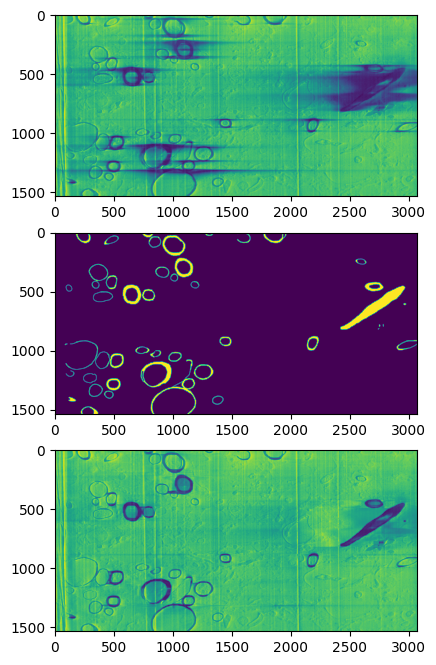

In [21]:
fig, (ax0,ax1,ax2) = plt.subplots(3,1, figsize=(8,8))
ax0.imshow(data_mousebrain_crop)
ax1.imshow(label_mousebrain_crop)
ax2.imshow(chafer_mousebrain_crop)

In [22]:
std_int_data = get_stddev_of_intensities_masked(data_mousebrain_crop, label_mousebrain_crop)
print(std_int_data)
std_int_res = get_stddev_of_intensities_masked(chafer_mousebrain_crop, label_mousebrain_crop)
print(std_int_res)

36.433701875919624
21.31204262757845


In [23]:
std_int_res/std_int_data

0.5849540818048018